In [2]:
pwd

'C:\\Users\\Surendra'

In [3]:
import os  #operating system


In [4]:
os.chdir('C:/Users/Surendra/Desktop/data science/TOP MENTOR/mysql/Top_mentor_projects_Datasets-main')

In [5]:
pwd

'C:\\Users\\Surendra\\Desktop\\data science\\TOP MENTOR\\mysql\\Top_mentor_projects_Datasets-main'

In [6]:
os.listdir()

['1000_Companies.csv',
 '7.1 car-sales.csv',
 '9.2 car-sales-missing-data.csv',
 'Amazon reviews.zip',
 'amzn_stock.pdf',
 'build_cap.csv',
 'Car_sales.csv',
 'Cities.csv',
 'day.csv',
 'Employee.csv',
 'Employee_Building.csv',
 'Example.xlsx',
 'Historical Heart Attack .xlsx',
 'Mall_Customers_Survey.csv',
 'movies.csv',
 'Movie_sales.csv',
 'nz_water_0.pdf',
 'Patients.xlsx',
 'Python Excecises - Basic_Advance - 1st part.pdf',
 'Retail.xls',
 'Students.csv',
 'Telecom retention_Telco Company .csv',
 'titles.csv']

In [7]:
import pandas as pd


In [10]:
df = pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


In [11]:
import psutil


In [14]:
print('cpu mampry is:', psutil.cpu_percent(4))

cpu mampry is: 12.3


In [15]:
df.shape

(157, 16)

In [38]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [41]:
df1 = df.dropna(axis =0)
df1.shape


(117, 16)

In [16]:
#prediction on car sales 

In [19]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [140]:
y = df1['Sales_in_thousands']
X = df1[['Horsepower','Power_perf_factor','Price_in_thousands','Length','__year_resale_value','Wheelbase']]#independent variavble

# Feature selection 

<AxesSubplot:>

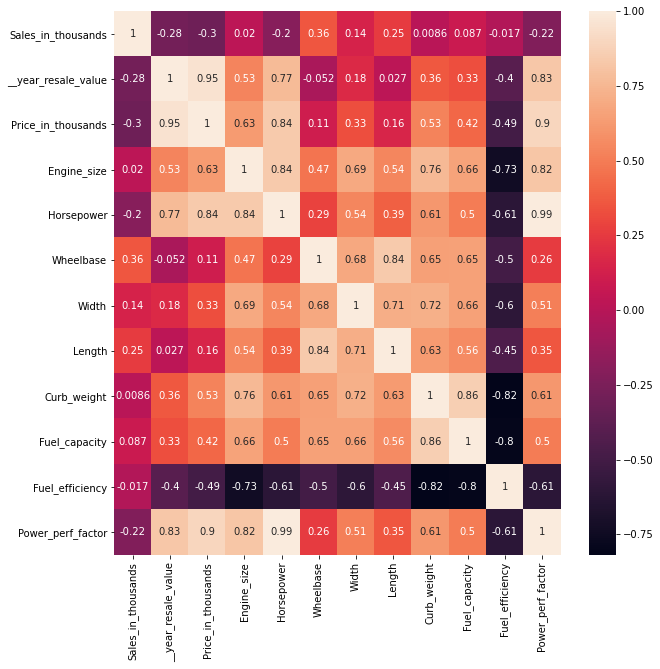

In [66]:
#process of feature selection come into picture
#1. coerreation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot =True)

In [141]:
#variance selection method  - it select the variable whose variance is high
k = df.var()
k

Sales_in_thousands     4628.002257
__year_resale_value     131.180007
Price_in_thousands      205.969949
Engine_size               1.091300
Horsepower             3214.926385
Wheelbase                58.389512
Width                    11.915419
Length                  180.412023
Curb_weight               0.397532
Fuel_capacity            15.115932
Fuel_efficiency          18.341567
Power_perf_factor       632.153558
Vehicle_type_cat          0.000000
dtype: float64

In [142]:
X.shape,y.shape

((117, 6), (117,))

# sampling of the data 

In [143]:
#sampling of the data/ providing the data set into training and testing
import sklearn 
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape,y_train.shape

((93, 6), (93,))

In [145]:
X_train.head()    #rendomly devidefd reduce the bias in the model

,Horsepower,Power_perf_factor,Price_in_thousands,Length,__year_resale_value,Wheelbase
149,115.0,47.946841,17.50,163.3,13.760,98.9
58,135.0,54.269548,15.35,188.8,13.210,106.9
60,205.0,83.602501,26.60,178.2,17.525,106.4
4,150.0,62.777639,23.99,178.0,22.255,102.6
43,120.0,49.645002,16.98,215.0,11.260,131.0


### model training

In [73]:
#liner regression= =1D AND 1ID or (multiple linear regression = 1D AND 2 ID OR MORE )

In [146]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()    # y = m1x1 + m2x2 + m3x3 + m4x4 + m5x5+ m6x6 + c

In [147]:
model_train = model.fit(X_train , y_train)
print('the model is trained')    #the model training with trining dataset

the model is trained


In [163]:
model_train.intercept_    #training data intercept

-351.3400860425335

In [164]:
model_train.coef_

array([-44.5398465 , 124.66531954, -52.16784692,  -0.71889518,
         3.14595626,   5.37807279])

In [165]:
X_train

,Horsepower,Power_perf_factor,Price_in_thousands,Length,__year_resale_value,Wheelbase
149,115.0,47.946841,17.500,163.3,13.760,98.9
58,135.0,54.269548,15.350,188.8,13.210,106.9
60,205.0,83.602501,26.600,178.2,17.525,106.4
4,150.0,62.777639,23.990,178.0,22.255,102.6
43,120.0,49.645002,16.980,215.0,11.260,131.0
...,...,...,...,...,...,...
105,170.0,72.290355,29.299,182.6,17.810,106.3
113,185.0,76.096570,25.345,201.4,15.240,120.0
90,210.0,85.949744,27.560,190.1,20.430,111.6
111,250.0,103.441693,36.229,205.4,19.890,113.8


In [158]:
#rules
X1 = float(input('Horsepower:'))
X2 = float(input('Power_perf_factor:'))
X3 = float(input('Price_in_thousands:'))
X4 = float(input('Length:'))
X5 = float(input('__year_resale_value'))
X6 = float(input('Wheelbase'))

y = (-44.5398465*X1 + 124.66531954*X2 -52.16784692*X3 - 0.7188951868*X4 +  3.14595626*X5 + 5.37807279*X6 -351.3400860425335)
print(y)

Horsepower:125
Power_perf_factor:51
Price_in_thousands:16
Length:185
__year_resale_value14
Wheelbase105
80.17026830946605


In [166]:
#validate model 
pred = model_train.predict(X_test)
pred

array([ 74.19169454,  28.94750081,  67.21545216,  59.22110808,
       127.90920845, 110.1043274 ,  30.95484076,  43.88873967,
        39.90819756,  29.40303665, 114.44222554, -71.03461491,
        32.2083126 ,  33.08631302,  47.16596694,  98.19802273,
       197.94104545,  61.26876474,  22.26971826,  66.88262236,
        72.02077933,  44.03713662,  28.4709897 , -18.12925798])

In [168]:
y_test

143     68.411
80      42.541
10      91.561
86      14.351
89      81.174
41      16.767
29      32.775
146     83.721
36       4.734
23      26.402
61      76.029
95       3.311
62      41.184
103     79.853
81      55.616
91      20.380
42      31.038
137    247.994
25      32.299
35      76.034
77      48.911
118     51.645
26      21.855
6        1.380
Name: Sales_in_thousands, dtype: float64

In [161]:
compare = pd.DataFrame({'actual_sales':y_test, 'predicted_sales':pred, 'erro':y_test-pred})
compare

,actual_sales,predicted_sales,erro
143,68.411,74.191695,-5.780695
80,42.541,28.947501,13.593499
10,91.561,67.215452,24.345548
86,14.351,59.221108,-44.870108
89,81.174,127.909208,-46.735208
41,16.767,110.104327,-93.337327
29,32.775,30.954841,1.820159
146,83.721,43.888740,39.832260
36,4.734,39.908198,-35.174198
23,26.402,29.403037,-3.001037


<AxesSubplot:xlabel='actual_sales', ylabel='predicted_sales'>

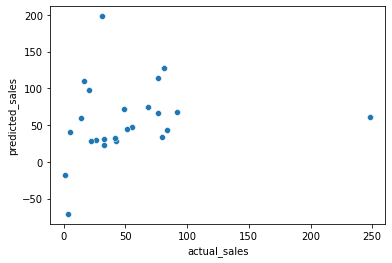

In [179]:
sns.scatterplot(x = 'actual_sales', y = 'predicted_sales',data = compare,)

In [169]:
m = model_train.score(X_train,y_train)
print('the accuracy of model is :',round(m*100,2))

the accuracy of model is : 33.98


In [ ]:
#accuracy is low which is 33.98 ~ 34%

### feature engineering

In [ ]:
#encoding of categorical variable

In [157]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
Vehicle_type_cat       float64
dtype: object

In [110]:
df['Model'].value_counts()

Neon              2
3000GT            1
323i              1
Boxter            1
Alero             1
                 ..
Corolla           1
Carrera Cabrio    1
Bravada           1
Diamante          1
SC                1
Name: Model, Length: 156, dtype: int64

In [112]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


In [116]:
df['Vehicle_type'].value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [125]:
d = {'Passanger':1, 'Car':0}     #CAT_CODES CONVERSION 

In [126]:
df['Vehicle_type_cat']= df['Vehicle_type'].map(d)

In [127]:
df[df['Vehicle_type'] == 'Car' ]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_type_cat
18,Cadillac,Escalade,14.785,NaN,Car,46.225,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15.0,4/17/2012,109.509117,0.0
33,Chrysler,Town & Country,53.480,19.540,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN,0.0
40,Dodge,Ram Pickup,227.061,15.060,Car,19.460,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17.0,03-06-2012,90.211700,0.0
41,Dodge,Ram Wagon,16.767,15.510,Car,21.315,3.9,175.0,109.6,78.8,192.6,4.245,32.0,15.0,01-06-2012,71.135292,0.0
42,Dodge,Ram Van,31.038,13.425,Car,18.575,3.9,175.0,127.2,78.8,208.5,4.298,32.0,16.0,7/26/2012,70.078322,0.0
43,Dodge,Dakota,111.313,11.260,Car,16.980,2.5,120.0,131.0,71.5,215.0,3.557,22.0,19.0,11/25/2011,49.645002,0.0
44,Dodge,Durango,101.323,NaN,Car,26.310,5.2,230.0,115.7,71.7,193.5,4.394,25.0,17.0,6/27/2012,92.854125,0.0
45,Dodge,Caravan,181.749,12.025,Car,19.565,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,09-01-2011,61.227000,0.0
52,Ford,Explorer,276.747,16.640,Car,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,4/25/2012,87.635496,0.0
53,Ford,Windstar,155.787,13.175,Car,21.410,3.0,150.0,120.7,76.6,200.9,3.761,26.0,21.0,2/25/2012,62.095048,0.0
